#### Description

This code evaluates the MSE of GA_1_0, GA_1_1, GA_1_2, and GA_1_3's GA algorithms to see if subpopulations and/or adaptive mutation rate increase the accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import GA_1_0
import GA_1_1
import GA_1_2
import GA_1_3

In [2]:
# Parameters
run_per_expression = 10
target_expressions = np.arange(0, 1.1, 0.1)
path_to_cnn = '../Models/CNN_6_1_2.keras'

# Genetic algorithm parameters
common_params = {
    "pop_size": 100,
    "generations": 100,
    "base_mutation_rate": 0.1,
    "precision": 0.001,
    "print_progress": False
}

# Specific parameters for multi-population algorithms
multi_pop_params = {
    "num_islands": 4,
    "migration_interval": 10,
    "num_migrants": 2
}

# Initialize CNN
cnn = GA_1_0.load_model(path_to_cnn)

# Define algorithms with required configurations
ga_algorithms = {
    "GA_1_0": {"func": GA_1_0.genetic_algorithm, "extra_params": {}},
    "GA_1_1": {"func": GA_1_1.genetic_algorithm, "extra_params": multi_pop_params},
    "GA_1_2": {"func": GA_1_2.genetic_algorithm, "extra_params": {}},
    "GA_1_3": {"func": GA_1_3.genetic_algorithm, "extra_params": multi_pop_params},
}

# Function to evaluate MSE for each algorithm
def evaluate_ga(algorithm, target_expressions, initial_sequence, runs, common_params, extra_params):
    errors = {target: 0 for target in target_expressions}
    for target in target_expressions:
        for i in range(runs):
            best_sequence, best_prediction = algorithm(
                cnn, initial_sequence, target, **common_params, **extra_params
            )
            errors[target] += (target - best_prediction) ** 2
            # print(f"Target: {round(target, 3)} | Run: {i + 1} | MSE: {round(errors[target] / (i + 1), 5)}", end="\r")
        errors[target] /= runs
        # print()
    return errors

def visualize_results(results):
    # Convert results to DataFrame
    df = pd.DataFrame(results)
    df.index = target_expressions

    # Plot results (MSE)
    plt.figure(figsize=(10, 6))
    for col in df.columns:
        plt.plot(df.index, df[col], marker='o', label=col)

    plt.xlabel('Target Expression')
    plt.ylabel('MSE')
    plt.legend(title="GA Algorithms")
    plt.grid(True)
    plt.show()

    # Plot results (log(MSE))
    plt.figure(figsize=(10, 6))
    for col in df.columns:
        plt.plot(df.index, np.log(df[col]), marker='o', label=col)

    plt.xlabel('Target Expression')
    plt.ylabel('log(MSE)')
    plt.legend(title="GA Algorithms")
    plt.grid(True)
    plt.show()

    # Calculate and display average MSE for each algorithm
    average_mse = df.mean(axis=0)
    print(average_mse)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
# Run evaluations for each algorithm using blank sequence (all N's) 
blank_sequence = 'N' * 75
blank_sequence_results = {}
for name, config in ga_algorithms.items():
    print(f"Running {name}")
    blank_sequence_results[name] = evaluate_ga(config["func"], target_expressions, blank_sequence, run_per_expression, common_params, config["extra_params"])

Running GA_1_0
Instructions for updating:
Use tf.identity with explicit device placement instead.
Running GA_1_1
Running GA_1_2
Running GA_1_3


In [4]:
# Run evaluations for each algorithm using P5 infill
P5 = "AATACTAGAGGTCTTCCGACNNNNNNATTAATCATCCGGCTCGNNNNNNNTGTGGAGCGGGAAGACAACTAGGGG"
P5_sequence_results = {}
for name, config in ga_algorithms.items():
    print(f"Running {name}")
    P5_sequence_results[name] = evaluate_ga(config["func"], target_expressions, P5, run_per_expression, common_params, config["extra_params"])

Running GA_1_0
Running GA_1_1
Running GA_1_2
Running GA_1_3


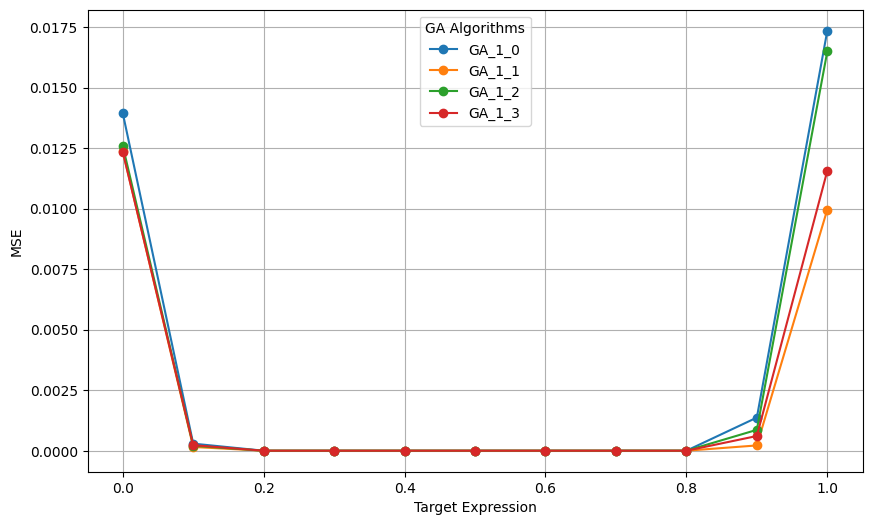

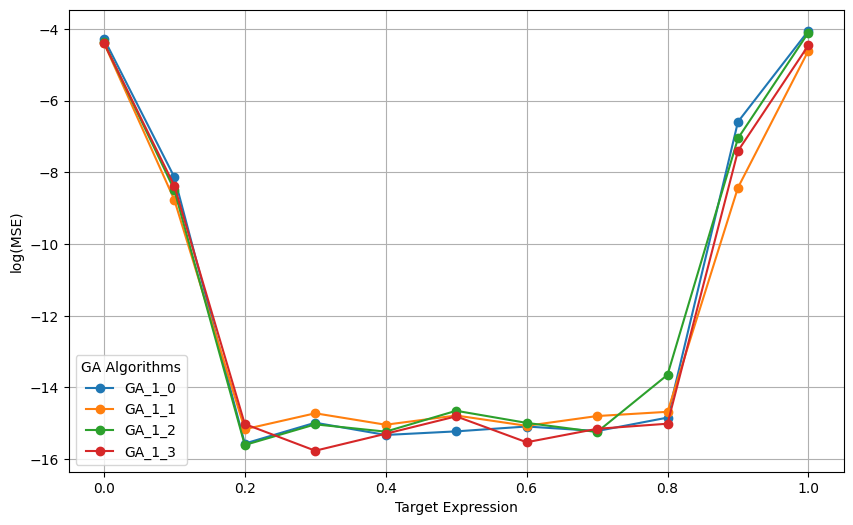

GA_1_0    0.002997
GA_1_1    0.002065
GA_1_2    0.002743
GA_1_3    0.002250
dtype: float64


In [5]:
visualize_results(blank_sequence_results)

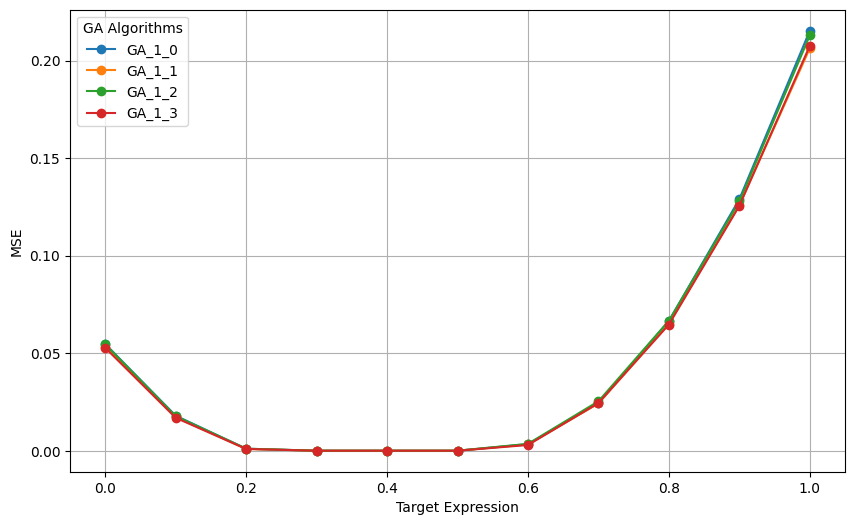

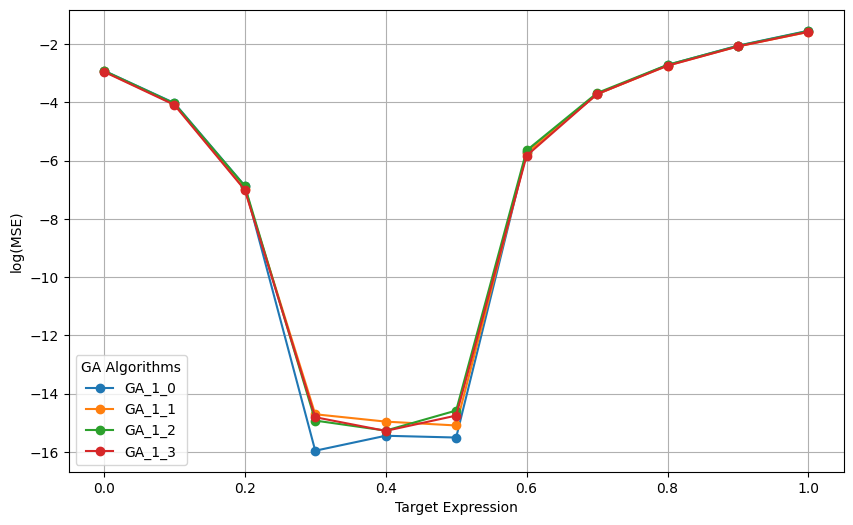

GA_1_0    0.046574
GA_1_1    0.045139
GA_1_2    0.046326
GA_1_3    0.045084
dtype: float64


In [6]:
visualize_results(P5_sequence_results)